In [3]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import scipy.stats as norm
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Excercise 1 - generate data

In [4]:
F = len('Jakub')        # F - number of letters in first name 
L = len('Majcher')      # L - number of letters in last name 
N = (L+F)*100           # N = (L+F)*100

model_code1 = CmdStanModel(stan_file='lab6/code_1.stan')
samples_code1 = model_code1.sample(data={'N': N}, 
                                   iter_sampling=1000, 
                                   iter_warmup=0, 
                                   chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,0.01,1.523310,-0.165771,-0.482094,0.183519,0.159352,-0.244397,1.314220,...,-0.915988,0.848560,1.021310,-0.247212,-0.303797,0.141540,1.271960,-1.440990,-0.170517,-0.312644
1,0.0,0.0,0.01,0.461743,1.034310,-1.959590,0.451987,0.221047,-0.092219,0.549575,...,-1.728840,0.832664,0.527810,-0.991110,-0.571552,0.208623,0.069843,-0.161672,1.723290,-0.444016
2,0.0,0.0,0.01,-0.544328,-1.276040,-0.381158,0.826363,-0.627695,-0.919706,0.872259,...,-0.834820,-1.139910,-1.005340,0.998908,-1.279270,-0.156285,-0.953175,0.256274,-0.250768,0.399919
3,0.0,0.0,0.01,0.697221,0.330597,-0.622758,-0.660488,0.000751,1.693460,0.163948,...,1.230750,-0.085592,-0.382835,0.438341,0.267859,0.921865,-0.725613,-1.575700,-0.031649,-0.990576
4,0.0,0.0,0.01,-0.137978,0.311539,-0.153581,0.176781,-0.161121,1.708210,-0.255821,...,1.592010,-0.401239,0.608789,-0.418234,-0.118203,-0.777380,-0.634704,-0.807404,0.392002,0.796780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.01,-2.677420,0.718314,-0.692591,0.503700,1.046550,-1.158840,0.469477,...,0.430778,0.289606,-0.275914,0.189038,1.333940,-1.510040,-0.626131,0.116340,0.621682,-0.628561
996,0.0,0.0,0.01,1.097260,-0.497713,-0.592906,0.482519,0.010158,0.323658,0.709904,...,0.080156,0.223750,0.753528,1.523330,0.468879,0.610406,0.157838,-0.483350,-0.009383,0.459283
997,0.0,0.0,0.01,-0.731741,-2.176440,0.132446,0.909571,0.936672,0.259715,0.962546,...,-0.123418,-1.391980,-0.581432,-1.350400,1.216040,1.116710,0.897072,11.422200,-0.560288,0.644747
998,0.0,0.0,0.01,-1.567430,0.670658,-1.165030,-0.987842,0.188015,0.273086,-0.730285,...,-1.009770,-1.024400,-0.164819,-1.025380,0.726069,0.718160,0.667109,2.003400,-1.266450,-1.200170


array([ 1.52331 , -0.165771, -0.482094, ..., -1.44099 , -0.170517,
       -0.312644])

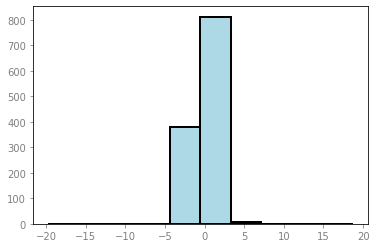

In [12]:
# Generated data display
df1 = samples_code1.draws_pd()
display(df1)

y1 = samples_code1.stan_variable('y')[0]
display(y1)

# Histogram
plt.hist(y1, bins=10, color="lightblue", edgecolor="black", linewidth=2)
plt.tick_params(axis='both', colors='grey')
plt.show()

In [13]:
model_code2 = CmdStanModel(stan_file='lab6/code_2.stan')
samples_code2 = model_code2.sample(data={'N': N}, 
                                   iter_sampling=1000, 
                                   iter_warmup=0, 
                                   chains = 1)

INFO:cmdstanpy:compiling stan file /lab6/code_2.stan to exe file /lab6/code_2
INFO:cmdstanpy:compiled model executable: /lab6/code_2
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,0.0,0.0,-0.376254,-0.292122,1.256740,0.326461,-0.526757,1.059820,-0.193529,0.055258,...,1.068750,-1.407730,0.397652,0.269098,3.18787,0.066080,2.441150,0.485026,0.287855,-0.610259
1,0.0,0.0,-1.884030,0.478204,0.696236,1.705000,0.467619,-0.476480,-1.197140,1.082880,...,-2.399620,1.665810,-0.635563,-3.368950,2.84962,-0.172189,5.016260,1.261240,0.153350,4.035510
2,0.0,0.0,-0.419660,-0.451945,-1.134340,1.724300,1.412010,-0.777066,-0.428721,-0.193033,...,3.700790,0.401196,6.853980,1.793140,-4.15003,1.438060,-0.918720,0.754052,-0.494004,-0.311922
3,0.0,0.0,-0.617655,0.225497,-0.465508,0.980654,-0.816727,-0.544997,0.057137,1.257230,...,0.507296,-1.565370,-1.048950,0.857628,-4.91176,-3.298060,-2.195940,2.164060,1.711760,1.813790
4,0.0,0.0,-0.065550,-1.002970,1.357500,0.393836,-0.568811,0.921881,-1.603080,1.291350,...,1.701080,-3.002220,-1.739220,4.846860,7.00472,0.657151,-1.114810,4.910890,1.631120,-2.254630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.007377,-0.186770,-0.553557,0.815378,1.798270,-0.293360,0.216782,0.294892,...,0.945115,3.506520,-0.753576,-0.125803,4.00486,1.230470,-1.226150,-9.719460,0.569979,-0.089458
996,0.0,0.0,-1.006610,0.540260,0.323275,1.523600,-0.393468,-1.118470,0.561683,0.609075,...,-1.877820,-3.913990,2.209760,1.411380,1.22497,-2.275620,-4.540030,2.903770,4.427450,-0.632904
997,0.0,0.0,0.143795,-1.024170,-0.514495,-0.635287,1.963880,-0.507242,0.015991,-0.669973,...,0.857007,2.092550,0.148145,1.510380,-2.39582,1.857540,-2.557730,-1.294900,1.745960,1.838640
998,0.0,0.0,-0.187037,0.691906,-0.457922,1.836320,1.143830,0.679931,-1.139820,-0.599656,...,10.362500,-5.234890,1.474730,-1.872370,1.45544,-5.326690,0.350730,-1.154030,0.002478,-3.642260


array([ 0.812034,  0.585622,  1.32303 , ...,  0.485026,  0.287855,
       -0.610259])

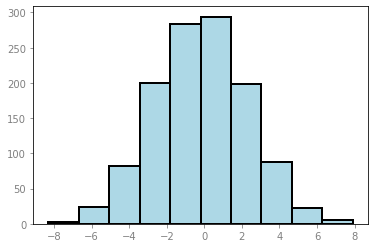

In [16]:
# Generated data display
df2 = samples_code2.draws_pd()
display(df2)

y2 = samples_code2.stan_variable('y')[0]
display(y2)

# Histogram
plt.hist(y2, bins=10, color='lightblue', edgecolor='black', linewidth=2)
plt.tick_params(axis='both', colors='grey')
plt.show()


Excercise 2 - compare normal and student models for data from first file

1. Compile both models

In [18]:
model_code3 = CmdStanModel(stan_file='lab6/code_3.stan')
model_code4 = CmdStanModel(stan_file='lab6/code_4.stan')

INFO:cmdstanpy:compiling stan file /lab6/code_3.stan to exe file /lab6/code_3
INFO:cmdstanpy:compiled model executable: /lab6/code_3
INFO:cmdstanpy:compiling stan file /lab6/code_4.stan to exe file /lab6/code_4
INFO:cmdstanpy:compiled model executable: /lab6/code_4


2. Fit both models

In [19]:
# Model3
fit3_1 = model_code3.sample(data={'N': N, 'y': y1}, 
                        iter_sampling=1000, 
                        iter_warmup=1, 
                        chains=1)

fit3_2 = model_code3.sample(data={'N': N, 'y': y2}, 
                        iter_sampling=1000, 
                        iter_warmup=1, 
                        chains = 1)

df3_1 = fit3_1.draws_pd()
df3_2 = fit3_2.draws_pd()

# Model4
fit4_1 = model_code4.sample(data={'N': N, 'y': y1}, 
                        iter_sampling=1000, 
                        iter_warmup=1, 
                        chains=1)

fit4_2 = model_code4.sample(data={'N': N, 'y': y2}, 
                        iter_sampling=1000, 
                        iter_warmup=1, 
                        chains = 1)

df4_1 = fit4_1.draws_pd()
df4_2 = fit4_2.draws_pd()

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


3. Using az.compare and az.plot_compare analyze both models using loo and waic criteria

3.1 WAIC

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_code4,0,-1914.759787,2.446825e-28,0.000000,0.865614,40.736906,0.000000,False,log
model_code3,1,-2352.102740,7.440930e-28,437.342953,0.134386,59.160844,51.763433,False,log


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_code3,0,-2996.46831,3.486765e-28,0.00000,0.693046,13.023633,0.000000,False,log
model_code4,1,-3076.51112,5.192184e-28,80.04281,0.306954,28.530729,20.363721,False,log


Text(0.5, 1.0, 'Model2 - WAIC')

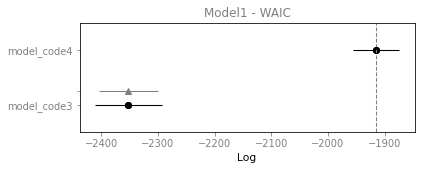

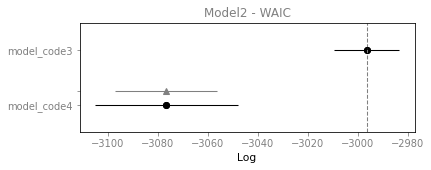

In [23]:
data_1 = {'model_code3': fit3_1,'model_code4': fit4_1}
data_2 = {'model_code3': fit3_2,'model_code4': fit4_2}

# Model1
model_waic_1_compare = az.compare(data_1, ic = 'waic')
display(model_waic_1_compare.head())
az.plot_compare(model_waic_1_compare)
plt.tick_params(axis='both', colors='grey')
plt.title('Model1 - WAIC', color = 'grey')

# Model2
model_waic_2_compare = az.compare(data_2, ic = 'waic')
display(model_waic_2_compare.head())
az.plot_compare(model_waic_2_compare)
plt.tick_params(axis='both', colors='grey')
plt.title('Model2 - WAIC', color = 'grey')


3.2 LOO

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_code4,0,-1914.759787,0.0,0.000000,0.865614,40.736906,0.000000,True,log
model_code3,1,-2352.102740,0.0,437.342953,0.134386,59.160844,51.763433,True,log


/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_code3,0,-2996.46831,0.0,0.00000,0.693046,13.023633,0.000000,True,log
model_code4,1,-3076.51112,0.0,80.04281,0.306954,28.530729,20.363721,True,log


Text(0.5, 1.0, 'Model2 - LOO')

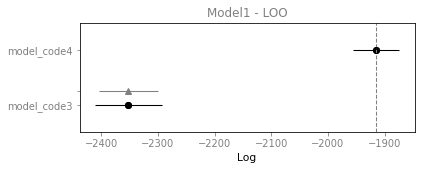

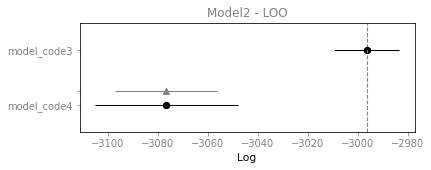

In [24]:
# Model1
model_waic_1_compare = az.compare(data_1, ic = 'loo', method="stacking")
display(model_waic_1_compare.head())
az.plot_compare(model_waic_1_compare)
plt.tick_params(axis='both', colors='grey')
plt.title('Model1 - LOO', color = 'grey')

# Model2
model_waic_2_compare = az.compare(data_2, ic = 'loo', method="stacking")
display(model_waic_2_compare.head())
az.plot_compare(model_waic_2_compare)
plt.tick_params(axis='both', colors='grey')
plt.title('Model2 - LOO', color = 'grey')

Excercise 3 - compare models with different numbers of predictors

1. Compile model

In [25]:
model_code5 = CmdStanModel(stan_file='lab6/code_5.stan')

INFO:cmdstanpy:compiling stan file /lab6/code_5.stan to exe file /lab6/code_5
INFO:cmdstanpy:compiled model executable: /lab6/code_5


In [28]:
x = samples_code2.stan_variable('X')

x1 = x.reshape(1000,-1)[0:1,:N]
x1 = np.transpose(x1)
fit5_1 = model_code5.sample(data={'N':N, 'K': 1, 'y':y2,'X':x1},
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)

x2 = x.reshape(1000,-1)[0:2,:N]
x2 = np.transpose(x2)
fit5_2 = model_code5.sample(data={'N':N, 'K': 2, 'y':y2,'X':x2},
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)

x3 = x.reshape(1000,-1)[0:3,:N]
x3 = np.transpose(x3)
fit5_3 = model_code5.sample(data={'N':N, 'K': 3, 'y':y2,'X':x3},
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=1, 
                            chains = 1)                            

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


2. Compare models for 1, 2 and 3 predictors as in previous excercise

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated sh

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
fit5_3,0,-3039.514950,0.0,0.000000,0.697966,31.959835,0.000000,True,log
fit5_1,1,-4302.453710,0.0,1262.938760,0.298366,114.835339,112.488933,True,log
fit5_2,2,-212882.231279,0.0,209842.716329,0.003668,9014.180538,9005.322069,True,log


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
fit5_3,0,-3039.514950,5.234092e-28,0.000000,0.697966,31.959835,0.000000,False,log
fit5_1,1,-4302.453710,1.503717e-27,1262.938760,0.298366,114.835339,112.488933,False,log
fit5_2,2,-212882.231279,7.376270e-24,209842.716329,0.003668,9014.180538,9005.322069,False,log


Text(0.5, 1.0, 'Model5 - WAIC')

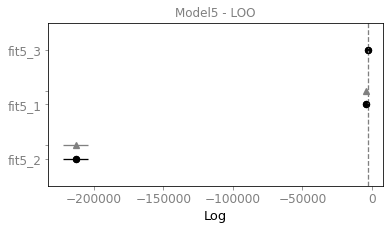

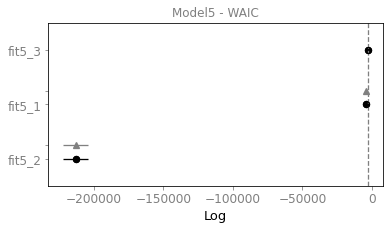

In [29]:
data_model_5 = {'fit5_1': fit5_1, 'fit5_2': fit5_2, 'fit5_3': fit5_3}

model_5_loo_compare = az.compare(data_model_5, ic="loo")
display(model_5_loo_compare.head())
az.plot_compare(model_5_loo_compare)
plt.tick_params(axis='both', colors='grey')
plt.title('Model5 - LOO', color='grey')

model_5_waic_compare = az.compare(data_model_5, ic="waic")
display(model_5_waic_compare.head())
az.plot_compare(model_5_waic_compare)
plt.tick_params(axis='both', colors='grey')
plt.title('Model5 - WAIC', color='grey')